<a href="https://colab.research.google.com/github/Antika20/Repo_Latihan_Machine_Learning/blob/main/Flower_Klasifikasi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Upload kaggle.json
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('kaggle.json "{kaggle}"'.format(
      kaggle=fn))

Saving kaggle.json to kaggle.json
kaggle.json "kaggle.json"


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/KAGGLE DATASET"

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/KAGGLE DATASET

/content/drive/MyDrive/Colab Notebooks/KAGGLE DATASET


In [5]:
!ls

 cat-dog		   model.png	    rose.jpg
'daisy (1).jpg'		  'rose (1).jpg'    sun1.jpg
 daisy.jpg		   rose1.jpg	   'sunflower (1).jpg'
'dandelion (1).jpg'	  'rose2 (1).jpg'   sunflower1.jpg
 dandelion1.jpg		  'rose2 (2).jpg'  'sunflower (2).jpg'
'dandelion (2).jpg'	  'rose2 (3).jpg'   sunflower.jpg
 dandelion.jpg		  'rose (2).jpg'   'tulip (1).jpg'
 flowers-recognition.zip   rose2.jpg	   'tulip (2).jpg'
'kaggle (1).json'	  'rose (3).jpg'   'tulip (3).jpg'
 kaggle.json		  'rose (4).jpg'   'tulip (4).jpg'
 klasifikasi-hewan.zip	  'rose (5).jpg'    tulip.jpg


In [6]:
# Download dataset
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# melakukan ekstraksi pada file zip
import os
import zipfile
local_zip = 'flowers-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/flowers-recognition.zip/')
zip_ref.close()

In [8]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/flowers-recognition.zip/flowers'

In [9]:
print(os.listdir(base_dir))

['daisy', 'tulip', 'sunflower', 'rose', 'dandelion']


In [10]:
# file direktori dengan gambar daisy untuk training
train_daisy_dir = os.path.join('/content/flowers-recognition.zip/flowers/daisy')

# file direktori dengan gambar dandelion untuk training
train_dandelion_dir = os.path.join('/content/flowers-recognition.zip/flowers/dandelion')

# file direktori dengan gambar rose untuk training
train_rose_dir = os.path.join('/content/flowers-recognition.zip/flowers/rose')

# file direktori dengan gambar sunflower untuk training
train_sunflower_dir = os.path.join('/content/flowers-recognition.zip/flowers/sunflower')

# file direktori dengan gambar tulip untuk training
train_tulip_dir = os.path.join('/content/flowers-recognition.zip/flowers/tulip')





In [11]:
print('total training daisy images ',len(os.listdir(train_daisy_dir)))

print('total training dandelion images ',len(os.listdir(train_dandelion_dir)))

print('total training rose images ',len(os.listdir(train_rose_dir)))

print('total training sunflower images ',len(os.listdir(train_sunflower_dir)))

print('total training tulip images ',len(os.listdir(train_tulip_dir)))


total training daisy images  764
total training dandelion images  1052
total training rose images  784
total training sunflower images  733
total training tulip images  984


In [12]:
train_daisy_names = os.listdir(train_daisy_dir) # penyimpan ke  model 

train_dandelion_names = os.listdir(train_dandelion_dir)

train_rose_names = os.listdir(train_rose_dir)

train_sunflower_names = os.listdir(train_sunflower_dir)

train_tulip_names = os.listdir(train_tulip_dir)

In [13]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


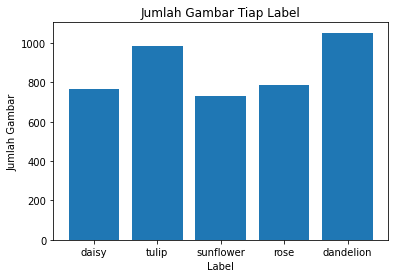

In [14]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

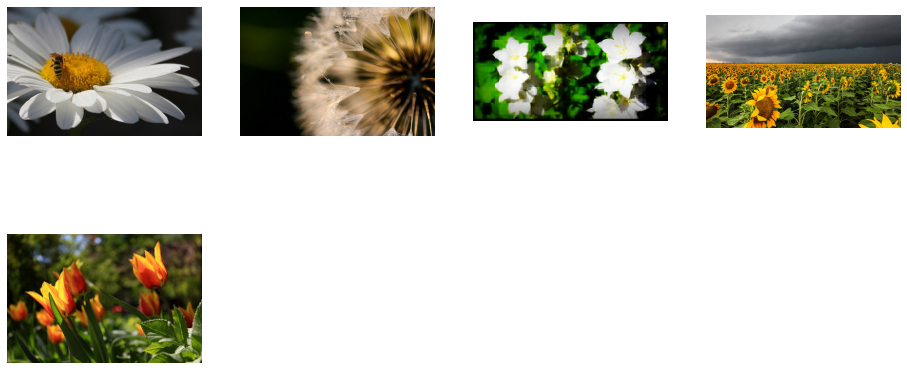

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Kita mau keluarin gambar dengan format 4x4
nrows = 4
ncols = 4

# index untuk iterasi
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 1
next_daisy_pix = [os.path.join(train_daisy_dir, fname) 
                for fname in train_daisy_names[pic_index-1:pic_index]]
                
next_dandelion_pix = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_names[pic_index-1:pic_index]]
                
next_rose_pix = [os.path.join(train_rose_dir, fname) 
                for fname in train_rose_names[pic_index-1:pic_index]]
next_sunflower_pix = [os.path.join(train_sunflower_dir, fname) 
                for fname in train_sunflower_names[pic_index-1:pic_index]]
next_tulip_pix = [os.path.join(train_tulip_dir, fname) 
                for fname in train_tulip_names[pic_index-1:pic_index]]

for i, img_path in enumerate(next_daisy_pix+next_dandelion_pix+next_rose_pix+next_sunflower_pix+next_tulip_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

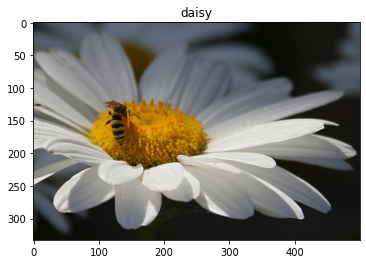

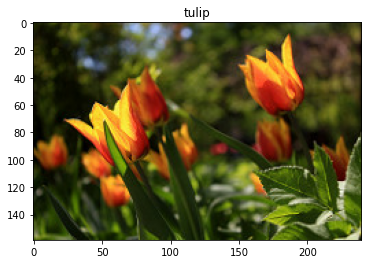

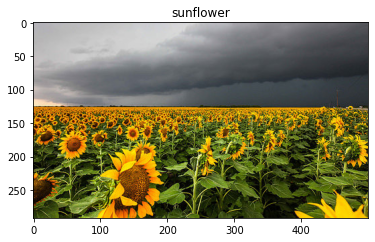

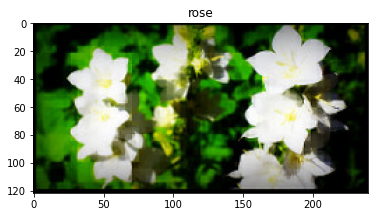

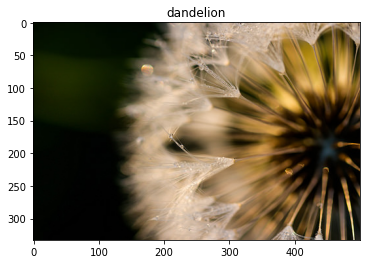

In [16]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [17]:
#untuk membuat Label -> Y
#ImageGenerator -> mudah mengklasifikasikan 2 gambar dalam 2  folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#resize nilai matriks pada gambar -> Mesinnya
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 20,
                                   horizontal_flip= True, # bisa model ke kiri dan kanan  
                                   shear_range = 0.2,
                                   validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(  # akan menampilkan dari directory 
    '/content/flowers-recognition.zip/flowers',  # sumber gambar 
    target_size =(300,300),  # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128,  # setiap ngabil data akan mengambil 128 data 
    subset= 'training',
    class_mode = 'categorical')  # ini karena 2 class 

val_generator = train_datagen.flow_from_directory( # akan menampilkan dari directory 
    '/content/flowers-recognition.zip/flowers', # sumber gambar 
    target_size =(300,300), # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128, # setiap ngabil data akan mengambil 128 data 
    subset= 'validation',
    class_mode = 'categorical') # ini karena 2 class 

# ini sebelum di augmentasi data -  > membuat data set dapat dilihat dari arah mana aja 

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [18]:
 # Membuat Model 
 # Cara 1 -> Membuat model kosong lalu tambahkan 
 # cara 2 -> membuat model seklaigus 
import tensorflow as tf

model = tf.keras.models.Sequential([ # singkat nya ->  model = sequential 
   #note the input shape is the deisred size of the image 300 x 300 with 3 bytes color 

   # This is the first convultion
tf.keras.layers.Conv2D(16,(3,3), activation ='relu', input_shape =(300,300,3)), # jumlah filter nya cnn ada 16, ukuran 3x3 , input shape = gambarnya 
tf.keras.layers.MaxPooling2D(2,2), # hasil convulusi , sixe gambar - size filter + 1 = 300 -3 +1 = 298 

   #the second convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),# akan mengambul nilai terbesar setiap 2x2  -> hasil max pooling = hasil convo / 2

  # the third convulution
tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# the Fourth convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),


# the Fitfh convulution
tf.keras.layers.Conv2D(512,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#flatten the result to feed into a CNN -> ngubah menjadi 1 dimensi 
tf.keras.layers.Flatten(),

# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),


# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),

# Hanya 1 output neuron, itu akan menjadi binary 0 atau 1 dimana 0 adalah kuda dan 1 adalah manusia 
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(5, activation='softmax') # sigmoid outnya o dan 1 

])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
# model = tf.keras.models.Sequential([
#     ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
#      tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Flatten(), 
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(6, activation='softmax')  
# ])
# model.layers[0].trainable = False

# Lanjutkan dengan menentukan optimizer, loss, serta metrik yang ingin digunakan pada model.
model.compile(loss= 'categorical_crossentropy',
               optimizer ='adam',
               metrics =['accuracy'])

# melakukan pelatihan model. 
history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
28/28 - 102s - loss: 1.6485 - accuracy: 0.2716 - val_loss: 1.6019 - val_accuracy: 0.2872 - 102s/epoch - 4s/step
Epoch 2/50
28/28 - 83s - loss: 1.3509 - accuracy: 0.3949 - val_loss: 1.2141 - val_accuracy: 0.4593 - 83s/epoch - 3s/step
Epoch 3/50
28/28 - 82s - loss: 1.2100 - accuracy: 0.4701 - val_loss: 1.1495 - val_accuracy: 0.4977 - 82s/epoch - 3s/step
Epoch 4/50
28/28 - 80s - loss: 1.2044 - accuracy: 0.4784 - val_loss: 1.2824 - val_accuracy: 0.4221 - 80s/epoch - 3s/step
Epoch 5/50
28/28 - 81s - loss: 1.2091 - accuracy: 0.4764 - val_loss: 1.1123 - val_accuracy: 0.5372 - 81s/epoch - 3s/step
Epoch 6/50
28/28 - 82s - loss: 1.1535 - accuracy: 0.5091 - val_loss: 1.3673 - val_accuracy: 0.3965 - 82s/epoch - 3s/step
Epoch 7/50
28/28 - 81s - loss: 1.3482 - accuracy: 0.3856 - val_loss: 1.2111 - val_accuracy: 0.4535 - 81s/epoch - 3s/step
Epoch 8/50
28/28 - 80s - loss: 1.1626 - accuracy: 0.4903 - val_loss: 1.1531 - val_accuracy: 0.5256 - 80s/epoch - 3s/step
Epoch 9/50
28/28 - 80s - loss:

In [ ]:
class Callback(tf.keras.callbacks.Callback): # batasan epochs
  def on_epoch_end(self, epoch, logs={}):
   if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
    self.model.stop_training = True

stopTraining = Callback()

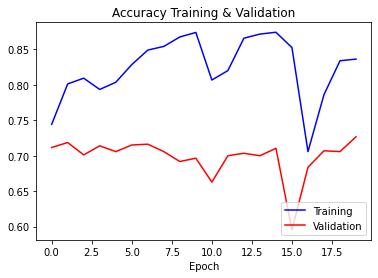

In [24]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

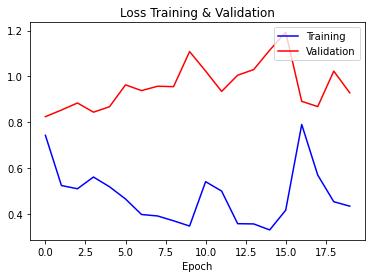

In [25]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

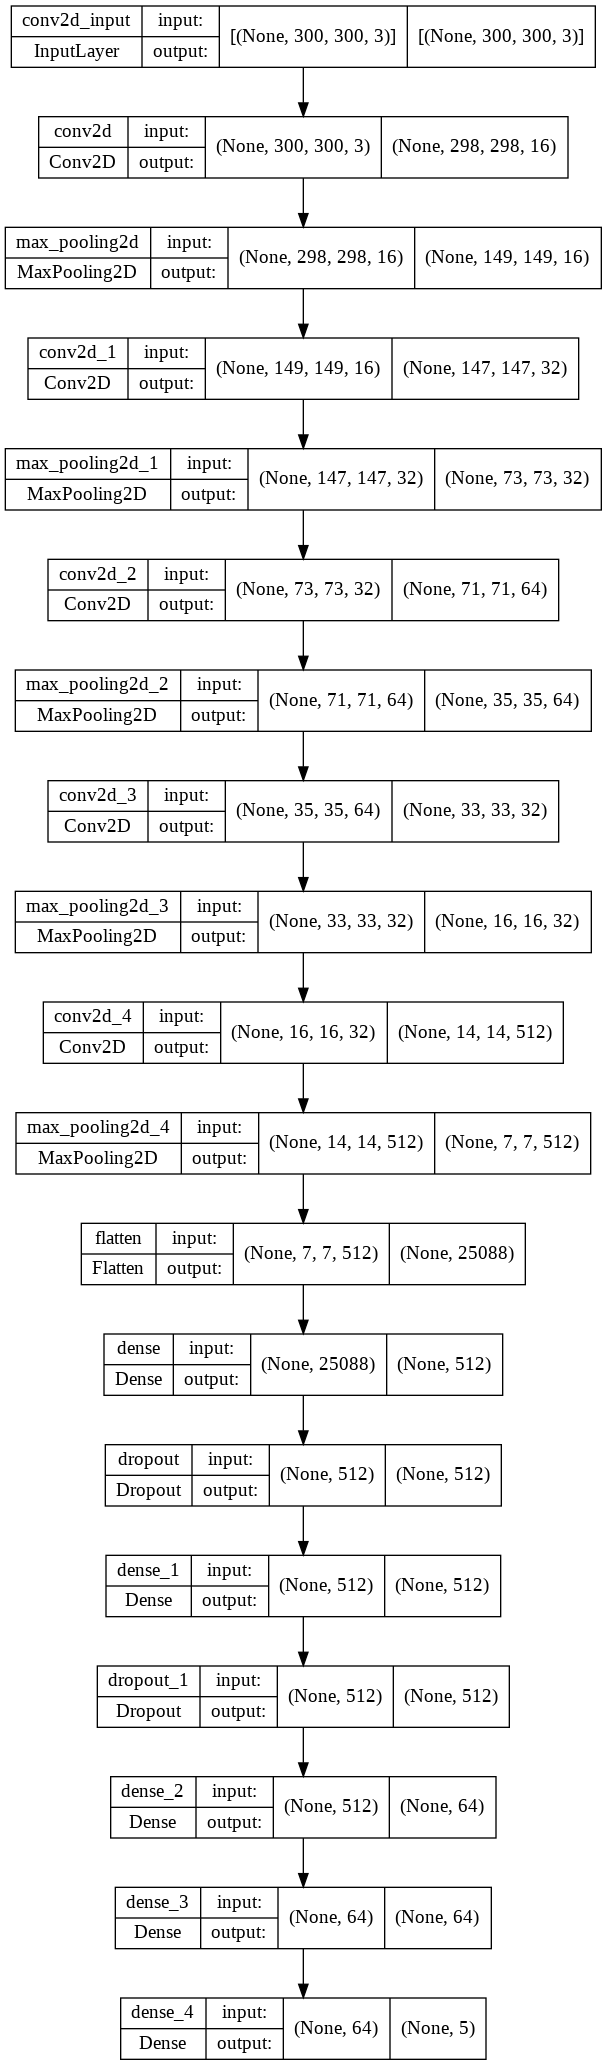

In [26]:
# mencetak gambarnya
tf.keras.utils.plot_model(
    model, to_file='model.png',show_shapes=True)

In [27]:
# Menampilkan daftar kelas atau label gambar
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Saving rose2.jpg to rose2 (4).jpg


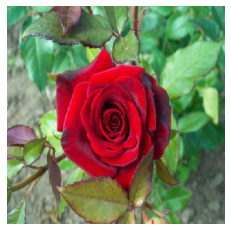

rose2.jpg
 GAMBAR INI ADALAH BUNGA MAWAR 


In [29]:
# melakukan prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path =   fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes = np.argmax(classes)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  
  print(fn)
  if classes== 0:
    print('GAMBAR INI ADALAH BUNGA DAISY ')
  elif classes==1:
    print('GAMBAR INI ADALAH BUNGA DANDELION')
  elif classes==2:
    print(' GAMBAR INI ADALAH BUNGA MAWAR ')
  elif classes==3:
    print('GAMBAR INI ADALAH BUNGA MATAHARI')
  else:
    print(' GAMBAR INI ADALAH BUNGA TULIP')